# PROJECT OVERVIEW

The objective of this project is to analyze bank customer data to identify the primary factors driving churn.  By identifying those patterns, the bank can develop targeted retention strategies to improve customer loyalty and reduce revenue loss.

**Project Steps**

1. Load and Combine the Data
2. Clean the Data (Pandas)
3. Explore the Data (Matplotlib and Seaborn)
4. Prepare Data For Modeling
5. Modeling (Scikit-Learn)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA AND COMBINE

In [33]:
## peak at excel file sheet names
file_path = 'Bank+Customer+Churn/Bank_Churn_Messy.xlsx'

xls = pd.ExcelFile(file_path)

print(xls.sheet_names)

['Customer_Info', 'Account_Info']


In [34]:
# load excel file sheets 'account_info' and 'customer_info'
account_df = pd.read_excel('Bank+Customer+Churn/Bank_Churn_Messy.xlsx', sheet_name=0)
customer_df = pd.read_excel('Bank+Customer+Churn/Bank_Churn_Messy.xlsx', sheet_name=1)
print(f'Accounts DF:\n {account_df.head()}\n')
print(f'Customers DF:\n {customer_df.head()}')

Accounts DF:
    CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602  Hargrave          619       FRA  Female  42.0       2   
1    15647311      Hill          608     Spain  Female  41.0       1   
2    15619304      Onio          502    French  Female  42.0       8   
3    15701354      Boni          699       FRA  Female  39.0       1   
4    15737888  Mitchell          850     Spain  Female  43.0       2   

  EstimatedSalary  
0      €101348.88  
1      €112542.58  
2      €113931.57  
3       €93826.63  
4        €79084.1  

Customers DF:
    CustomerId    Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0    15634602       €0.0              1       Yes       2            Yes   
1    15634602       €0.0              1       Yes       2            Yes   
2    15647311  €83807.86              1       Yes       1            Yes   
3    15619304  €159660.8              3        No       8             No   
4    15701354       €0.0             

In [35]:
# left join 'account_df' to 'customer_df' on customer_id 

bankcustomers_df = pd.merge(
    left= customer_df, 
    right=account_df, 
    on='CustomerId', 
    how='left'
)

bankcustomers_df.head(10)

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63
5,15737888,€125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,2,€79084.1
6,15574012,€113755.78,2,No,8,No,1,Chu,645,Spain,Male,44.0,8,€149756.71
7,15592531,€0.0,2,Yes,7,Yes,0,Bartlett,822,France,Male,50.0,7,€10062.8
8,15656148,€115046.74,4,No,4,No,1,Obinna,376,Germany,Female,29.0,4,€119346.88
9,15792365,€142051.07,2,Yes,4,Yes,0,He,501,French,Male,44.0,4,€74940.5


# CLEAN THE DATA

## DROP DUPLICATE COLUMNS AND ROWS

In [36]:
# drop Tenure_y column as it is redundant to Tenure_x
bankcustomers_df = bankcustomers_df.drop(columns=['Tenure_y'])

# rename Tenure_x to Tenure
bankcustomers_df = bankcustomers_df.rename(columns={'Tenure_x': 'Tenure'})

# validate changes
bankcustomers_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,€93826.63


In [37]:
# check for duplicate rows
print(f'Duplicate rows found: {bankcustomers_df.duplicated().sum()}')

Duplicate rows found: 4


In [38]:
# remove duplicate rows, while keeping first occurrence of row
bankcustomers_df = bankcustomers_df.drop_duplicates()

In [39]:
# validate changes
print(f'Shape: {bankcustomers_df.shape}')
print(f'First 5 rows: {bankcustomers_df.head()}')

Shape: (10000, 13)
First 5 rows:    CustomerId     Balance  NumOfProducts HasCrCard  Tenure IsActiveMember  \
0    15634602        €0.0              1       Yes       2            Yes   
2    15647311   €83807.86              1       Yes       1            Yes   
3    15619304   €159660.8              3        No       8             No   
4    15701354        €0.0              2        No       1             No   
5    15737888  €125510.82              1       Yes       2            Yes   

   Exited   Surname  CreditScore Geography  Gender   Age EstimatedSalary  
0       1  Hargrave          619       FRA  Female  42.0      €101348.88  
2       0      Hill          608     Spain  Female  41.0      €112542.58  
3       1      Onio          502    French  Female  42.0      €113931.57  
4       0      Boni          699       FRA  Female  39.0       €93826.63  
5       0  Mitchell          850     Spain  Female  43.0        €79084.1  


## CHECK AND CONVERT DATA TYPES

In [40]:
# check column data types
bankcustomers_df.dtypes

CustomerId           int64
Balance             object
NumOfProducts        int64
HasCrCard           object
Tenure               int64
IsActiveMember      object
Exited               int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
EstimatedSalary     object
dtype: object

## Data Type Notes

1. HasCrCard, IsActiveMember are both object dt's but would be more appropriate as boolean or ints.  Change from 'Yes' or 'No' to 1 for true and 0 for false
2. Age should be int, not float
3. EstimatedSalary should be changed to float and move the currency indicator into the column name
4. Balance should be changed to float and move the currency indicator into the column name

In [41]:
## change HasCrCard and IsActiveMember to binary columns represented by ints, not objects

# list of columns to convert
cols = ['HasCrCard', 'IsActiveMember']

# replace 'Yes' with 1 and 'No' with 0, then convert to int data type
bankcustomers_df[cols] = bankcustomers_df[cols].replace({'Yes': 1, 'No': 0}).astype(int)

# verify changes
print(bankcustomers_df[cols].dtypes)
print(bankcustomers_df[cols].head())

HasCrCard         int64
IsActiveMember    int64
dtype: object
   HasCrCard  IsActiveMember
0          1               1
2          1               1
3          0               0
4          0               0
5          1               1


/var/folders/nf/zsch_w8n2tbbqhl84qkhbjy00000gn/T/ipykernel_3665/1804908456.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bankcustomers_df[cols] = bankcustomers_df[cols].replace({'Yes': 1, 'No': 0}).astype(int)


In [42]:
# check for NaN or missing values in Age column
bankcustomers_df['Age'].isna().sum()

np.int64(3)

In [43]:
# calculate median of Age column
age_median = bankcustomers_df['Age'].median()

# replace NaN values in Age column with median value of column and convert to int dtype
bankcustomers_df['Age'] = bankcustomers_df['Age'].fillna(age_median).astype(int)

# verify changes
print(bankcustomers_df['Age'].dtypes)
print(f'Missing values: {bankcustomers_df['Age'].isna().sum()}')

int64
Missing values: 0


In [44]:
# remove € and commas from EstimatedSalary rows and convert to float
bankcustomers_df['EstimatedSalary'] = (
    bankcustomers_df['EstimatedSalary']
    .str.replace('€', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# rename the column to indicate Euro currency format
bankcustomers_df = bankcustomers_df.rename(columns={
    'EstimatedSalary': 'EstimatedSalary_Euros'})

# verify changes
print(bankcustomers_df['EstimatedSalary_Euros'].dtype)
print(bankcustomers_df.head())

float64
   CustomerId     Balance  NumOfProducts  HasCrCard  Tenure  IsActiveMember  \
0    15634602        €0.0              1          1       2               1   
2    15647311   €83807.86              1          1       1               1   
3    15619304   €159660.8              3          0       8               0   
4    15701354        €0.0              2          0       1               0   
5    15737888  €125510.82              1          1       2               1   

   Exited   Surname  CreditScore Geography  Gender  Age  EstimatedSalary_Euros  
0       1  Hargrave          619       FRA  Female   42              101348.88  
2       0      Hill          608     Spain  Female   41              112542.58  
3       1      Onio          502    French  Female   42              113931.57  
4       0      Boni          699       FRA  Female   39               93826.63  
5       0  Mitchell          850     Spain  Female   43               79084.10  


In [45]:
# remove € and commas from Balance rows and convert to float
bankcustomers_df['Balance'] = (
    bankcustomers_df['Balance']
    .str.replace('€', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# rename the column to indicate Euro currency format
bankcustomers_df = bankcustomers_df.rename(columns={
    'Balance': 'Balance_Euros'})

# verify changes
print(bankcustomers_df['Balance_Euros'].dtype)
print(bankcustomers_df.head())

float64
   CustomerId  Balance_Euros  NumOfProducts  HasCrCard  Tenure  \
0    15634602           0.00              1          1       2   
2    15647311       83807.86              1          1       1   
3    15619304      159660.80              3          0       8   
4    15701354           0.00              2          0       1   
5    15737888      125510.82              1          1       2   

   IsActiveMember  Exited   Surname  CreditScore Geography  Gender  Age  \
0               1       1  Hargrave          619       FRA  Female   42   
2               1       0      Hill          608     Spain  Female   41   
3               0       1      Onio          502    French  Female   42   
4               0       0      Boni          699       FRA  Female   39   
5               1       0  Mitchell          850     Spain  Female   43   

   EstimatedSalary_Euros  
0              101348.88  
2              112542.58  
3              113931.57  
4               93826.63  
5        

## HANDLE MISSING VALUES

In [46]:
bankcustomers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             10000 non-null  int64  
 1   Balance_Euros          10000 non-null  float64
 2   NumOfProducts          10000 non-null  int64  
 3   HasCrCard              10000 non-null  int64  
 4   Tenure                 10000 non-null  int64  
 5   IsActiveMember         10000 non-null  int64  
 6   Exited                 10000 non-null  int64  
 7   Surname                9997 non-null   object 
 8   CreditScore            10000 non-null  int64  
 9   Geography              10000 non-null  object 
 10  Gender                 10000 non-null  object 
 11  Age                    10000 non-null  int64  
 12  EstimatedSalary_Euros  10000 non-null  float64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [47]:
## only 3 missing values in Surname column

# replace empty values in Surname with 'Missing'
bankcustomers_df['Surname'] = bankcustomers_df['Surname'].fillna('Missing')

bankcustomers_df['Surname'].isna().sum()

np.int64(0)

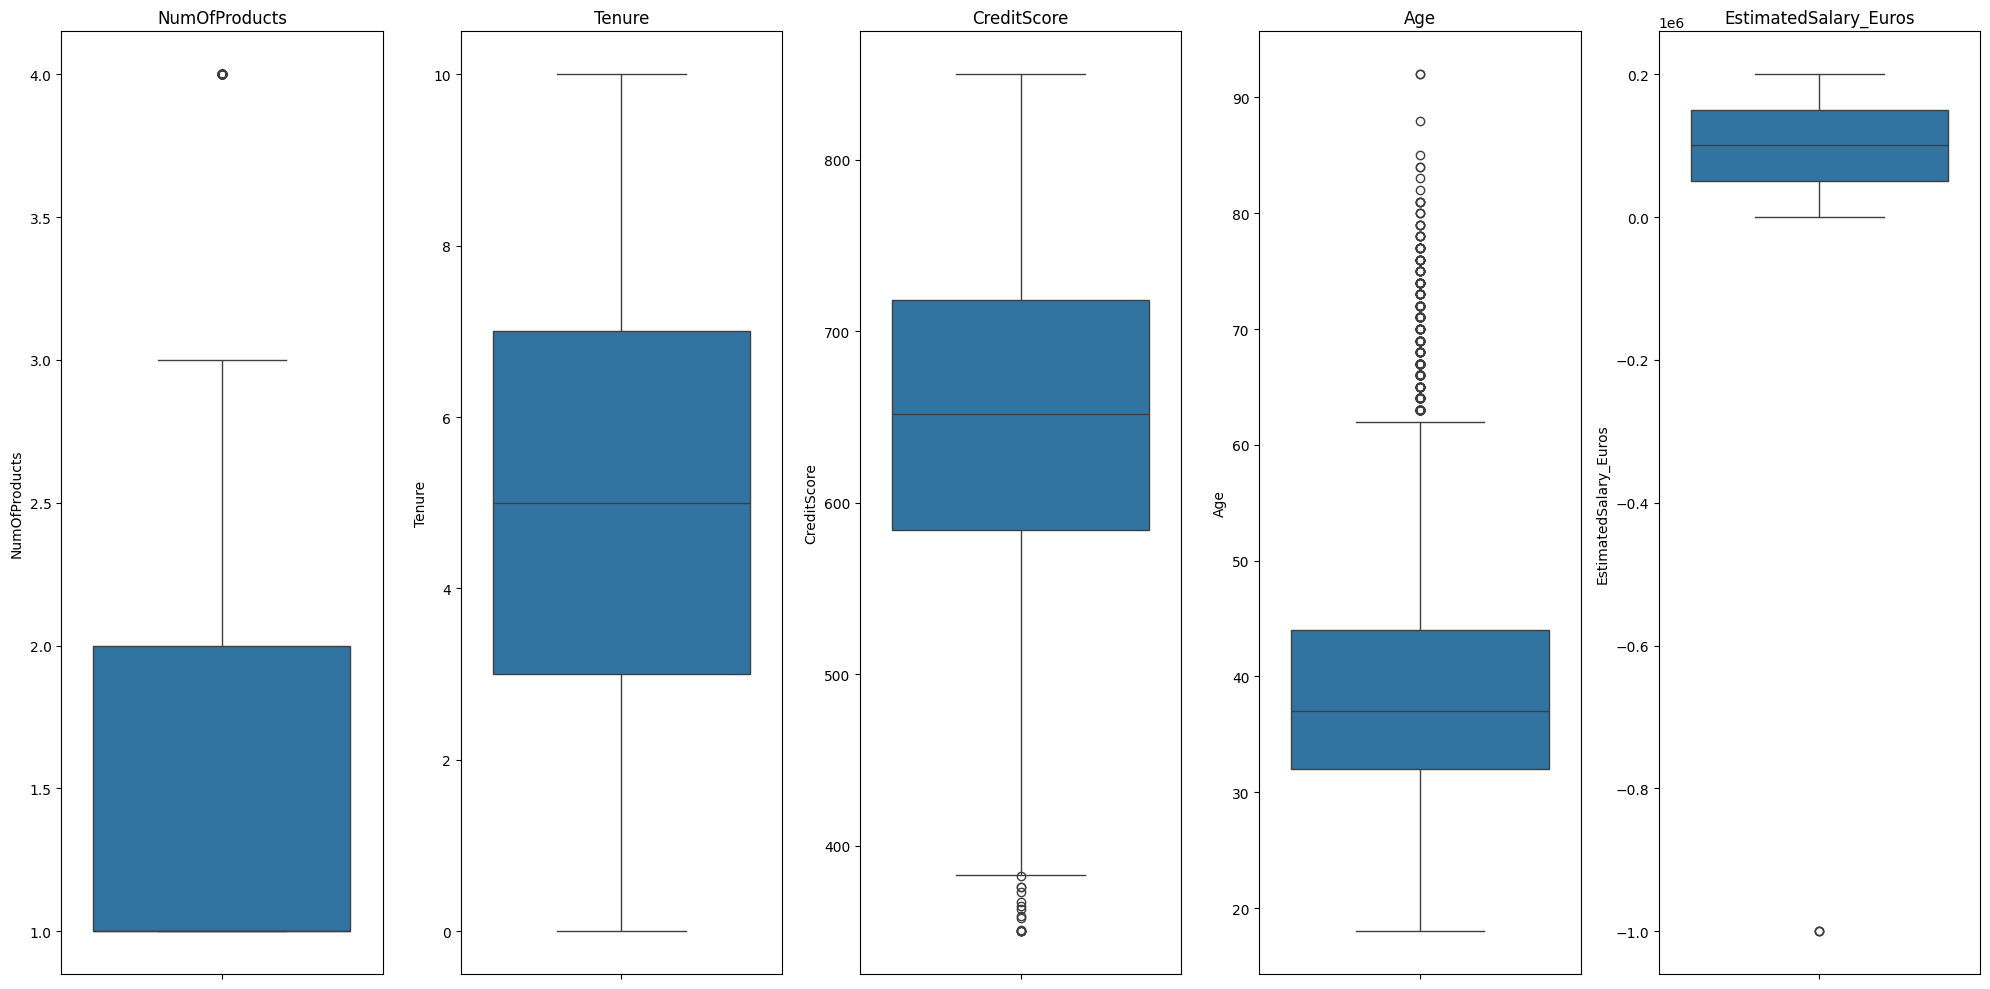

In [48]:
# check for outliers in numeric columns

# create boxplots for all numeric columns to display any outliers
# define columns to plot
cols_to_plot = ['NumOfProducts', 'Tenure', 'CreditScore', 'Age', 'EstimatedSalary_Euros']

# set up figure with subplots to maintain scale across large ranges
fig, axes = plt.subplots(1, 5, figsize=(20,10))

# loop through columns and create a boxplot for each in its own subplot
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=bankcustomers_df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [49]:
# identify negative salary in EstimatedSalary_Euros
bankcustomers_df = bankcustomers_df[bankcustomers_df['EstimatedSalary_Euros'] >= 0]

bankcustomers_df['EstimatedSalary_Euros'].min()

np.float64(11.58)

### OUTLIER NOTES

1. removed negative salary value in EstimatedSalary_Euros as that value is non-sensical
2. There are numerous high age values, but I will leave alone as they are valuable data to the final analysis
3. the outlier in NumOfProducts is also realistic and should not be removed
4. there are numerous low outliers in CreditScore, but once again, I do not feel these warrant removal from the data

## HANDLE TEXT VARIATIONS AND TYPOS IN CATEGORICAL COLUMNS

In [50]:
bankcustomers_df['Geography'].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

In [51]:
# standardize values in Geography column, replacing all variations for France with France
bankcustomers_df['Geography'] = bankcustomers_df['Geography'].replace(
    {'FRA': 'France',
     'French': 'France',}
)

bankcustomers_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# EXPLORE THE DATA

Occurrences of Churn (1) vs Non-Churn (0):
 Exited
0    7960
1    2037
Name: count, dtype: int64


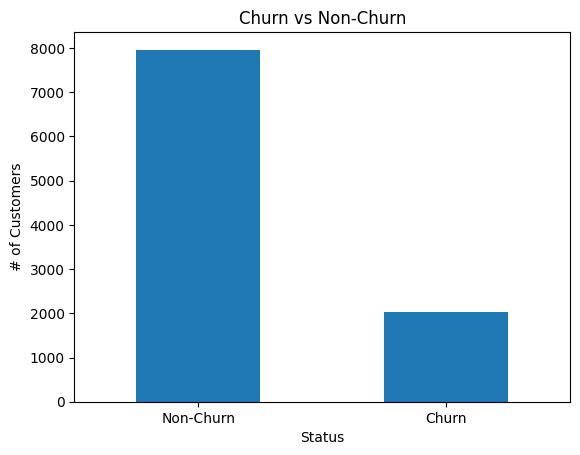

In [52]:
## create bar chart displaying the count of churners (Exited=1) vs non-churners (Exited=0)

# create Series with summed counts of churn and non-churn
churn_counts = bankcustomers_df['Exited'].value_counts()

print(f'Occurrences of Churn (1) vs Non-Churn (0):\n {churn_counts}')

# rename index for chart labeling purposes
churn_counts.index = ['Non-Churn', 'Churn']

# plot the Series
churn_counts.plot(
    kind='bar', 
    title='Churn vs Non-Churn', 
    xlabel='Status', 
    ylabel='# of Customers',
    rot=0
)

plt.show()

* Based on the large disparity in classes (only ~20% churn vs ~80% non-churn) classes would likely need to be balanced before training using a technique like SMOTE.  Without balancing, the model would likely return a bias towards the majority class, rendering the results of the model far too conservative.

In [53]:
## Explore the categorical variables vs the target. Look at the percentage of Churners by 'Geography' and 'Gender'

# filter for churners (Exited=1)
churners = bankcustomers_df[bankcustomers_df['Exited'] == 1]

# group by Geography and Gender, count occurrences
churn_by_group = churners.groupby(['Geography', 'Gender']).size()

# calculate percentage 
churn_percentage = (churn_by_group / len(churners)) * 100

print(churn_percentage)

Geography  Gender
France     Female    22.582229
           Male      17.182131
Germany    Female    21.993127
           Male      17.967599
Spain      Female    11.340206
           Male       8.934708
dtype: float64


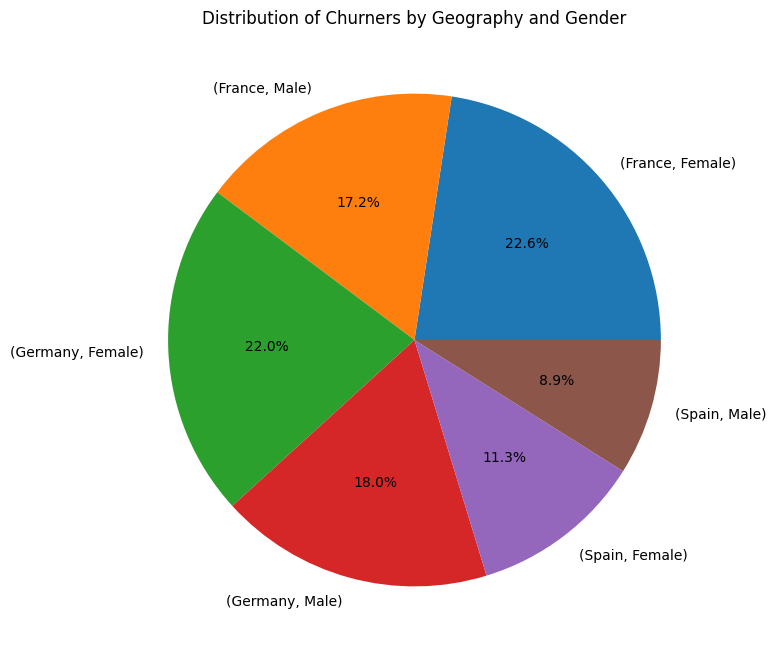

In [54]:
# create pie chart to visualize
churn_percentage.plot(
    kind='pie',
    autopct='%1.1f%%',
    ylabel='',
    title='Distribution of Churners by Geography and Gender',
    figsize=(8, 8)
)

plt.show()

/var/folders/nf/zsch_w8n2tbbqhl84qkhbjy00000gn/T/ipykernel_3665/163256251.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Churn', 'Churn'])
/var/folders/nf/zsch_w8n2tbbqhl84qkhbjy00000gn/T/ipykernel_3665/163256251.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Churn', 'Churn'])
/var/folders/nf/zsch_w8n2tbbqhl84qkhbjy00000gn/T/ipykernel_3665/163256251.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Non-Churn', 'Churn'])
/var/folders/nf/zsch_w8n2tbbqhl84qkhbjy00000gn/T/ipykernel_3665/163256251.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_

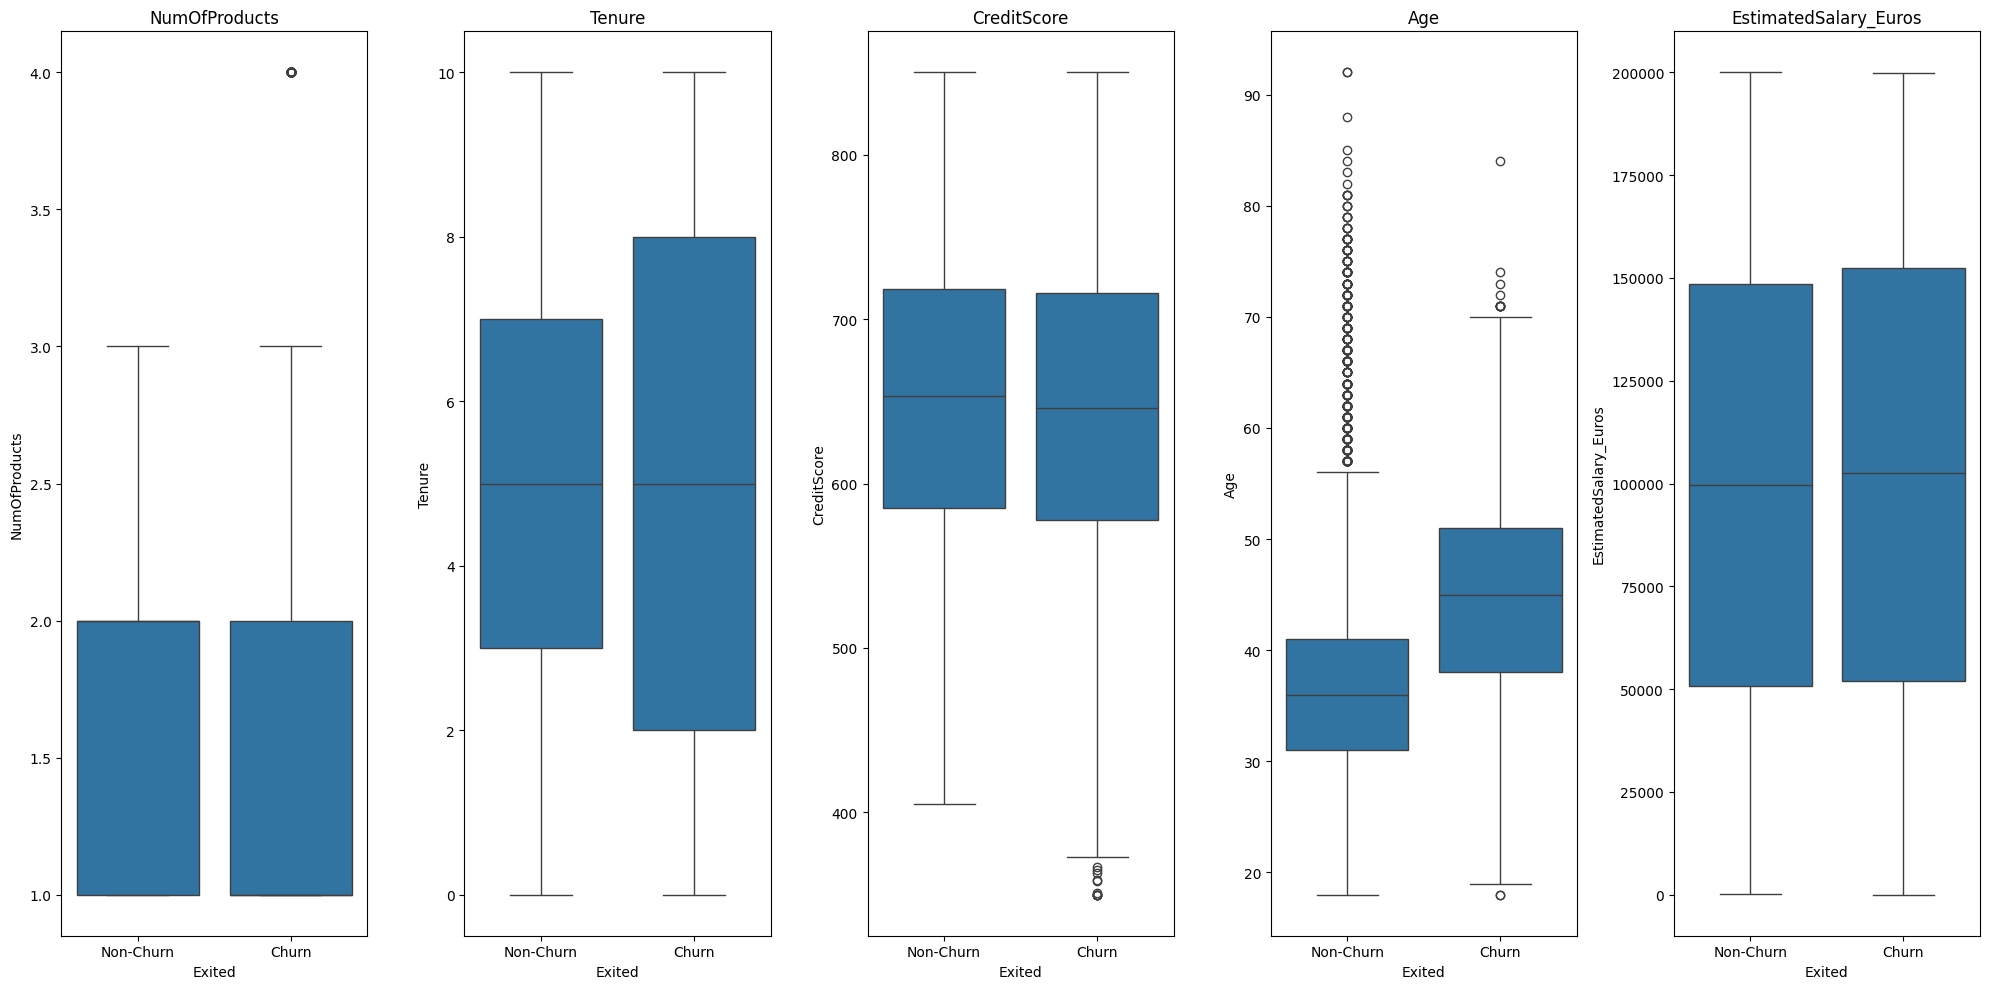

In [55]:
## build box plots for each numeric field, broken out by churners vs non-churners

cols_to_plot = ['NumOfProducts', 'Tenure', 'CreditScore', 'Age', 'EstimatedSalary_Euros']

# set up figure with subplots to maintain scale across large ranges
fig, axes = plt.subplots(1, 5, figsize=(20,10))

# loop through columns and create a boxplot for each in its own subplot
for i, col in enumerate(cols_to_plot):
    sns.boxplot(data=bankcustomers_df, x='Exited', y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(['Non-Churn', 'Churn'])

plt.tight_layout()
plt.show()

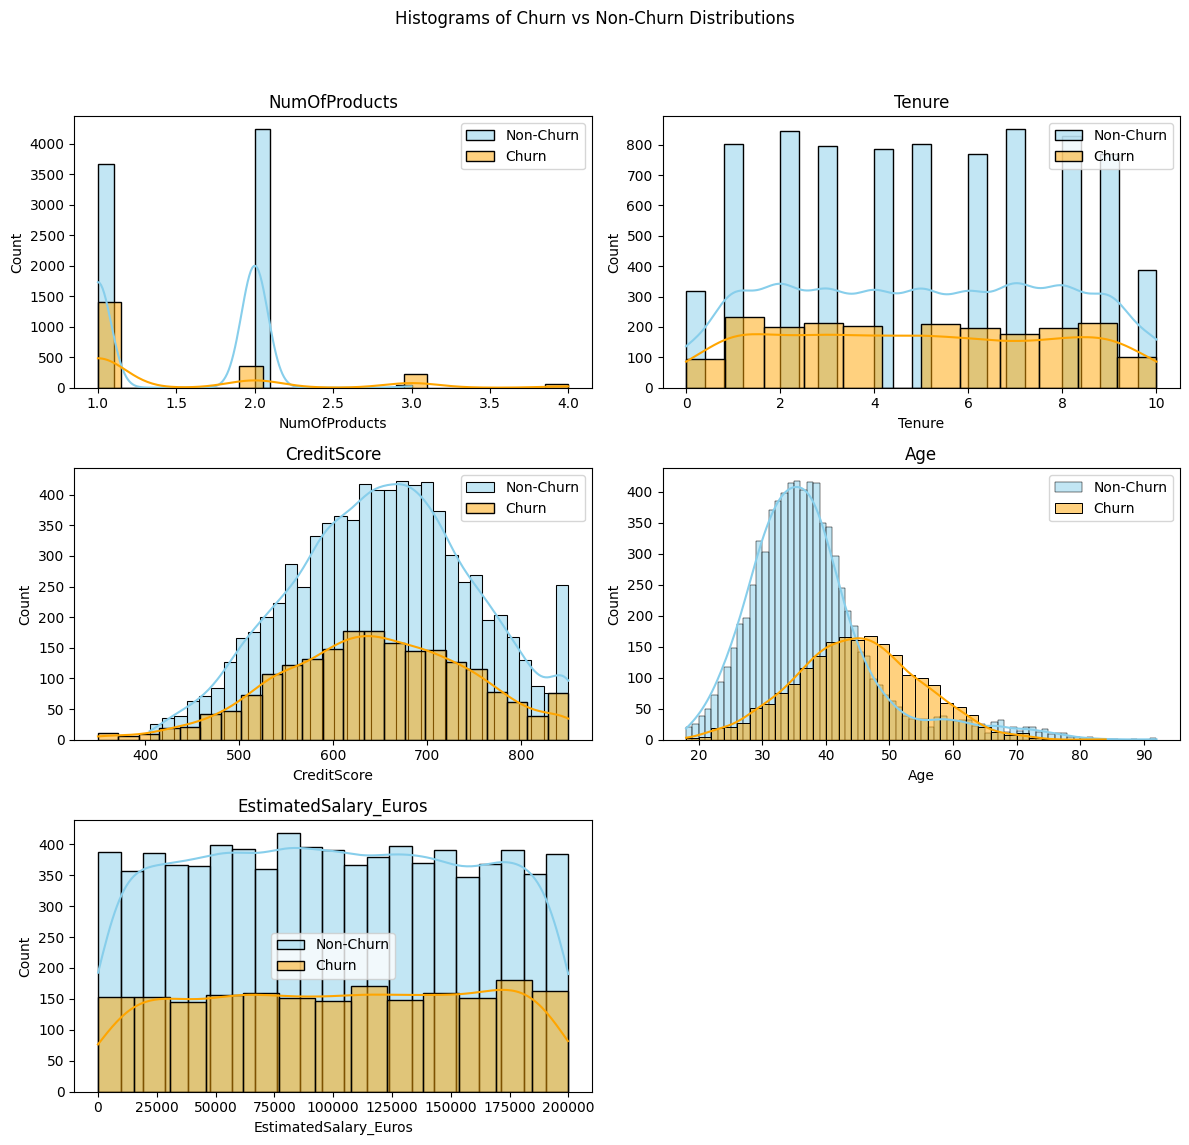

In [56]:
## build histograms for each numeric field, broken out by churner vs non-churners

cols_to_plot = ['NumOfProducts', 'Tenure', 'CreditScore', 'Age', 'EstimatedSalary_Euros']

# set up figure with subplots to maintain scale across large ranges
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Histograms of Churn vs Non-Churn Distributions')

axes_flat = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.histplot(bankcustomers_df[bankcustomers_df['Exited'] == 0][col],
                 color='skyblue', label='Non-Churn', ax=axes_flat[i], kde=True)

    sns.histplot(bankcustomers_df[bankcustomers_df['Exited'] == 1][col],
                 color='orange', label='Churn', ax=axes_flat[i], kde=True)

    axes_flat[i].set_title(col)
    axes_flat[i].legend()

fig.delaxes(axes_flat[5])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# PREPARE DATA FOR MODELING

In [57]:
## create a new dataset that excludes any columns that aren't suitable for modeling

# drop Tenure, Surname, and CustomerId from df
bankcustomers_df = bankcustomers_df.drop(['CustomerId', 'Tenure', 'Surname'], axis=1)


In [58]:
## create dummy variables for categorical fields
# create dummy variables for Geography and Gender columns
bankcustomers_df = pd.get_dummies(bankcustomers_df, columns=['Geography', 'Gender'], drop_first=True)

bankcustomers_df.head()

,Balance_Euros,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore,Age,EstimatedSalary_Euros,Geography_Germany,Geography_Spain,Gender_Male
0,0.00,1,1,1,1,619,42,101348.88,False,False,False
2,83807.86,1,1,1,0,608,41,112542.58,False,True,False
3,159660.80,3,0,0,1,502,42,113931.57,False,False,False
4,0.00,2,0,0,0,699,39,93826.63,False,False,False
5,125510.82,1,1,1,0,850,43,79084.10,False,True,False


* I created a 'balance_v_income' feature to test if customers with high liquidity relative to their income are more or less likely to churn.  The boxplot suggests that churned customers (Exited=1) tend to have a slightly higher ratio median

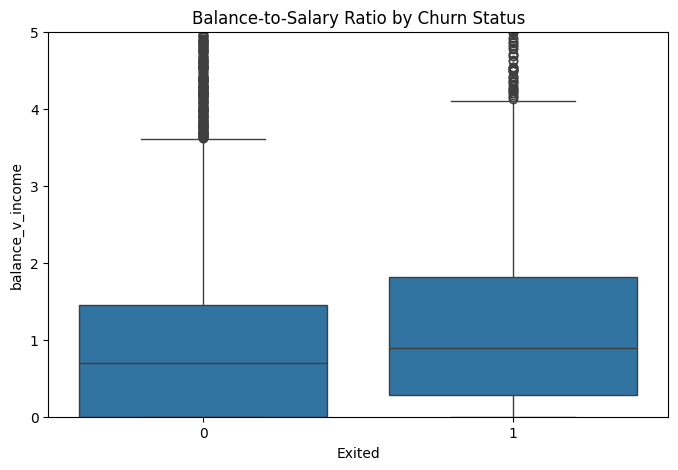

In [60]:
##Create a new 'balance_v_income' feature, which divides a customer's bank balance
#by their estimated salary, then visualize that feature vs. churn status

# create new feature 'balance_v_income'
bankcustomers_df['balance_v_income'] = bankcustomers_df['Balance_Euros'] / bankcustomers_df['EstimatedSalary_Euros']

# create visualize for new feature to see if it predicts churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=bankcustomers_df, x='Exited', y='balance_v_income')
plt.title('Balance-to-Salary Ratio by Churn Status')
plt.ylim(0, 5)
plt.show()

# MODELING

## DATA SPLITTING

In [61]:
from sklearn.model_selection import train_test_split

# define features and target
X = bankcustomers_df.drop('Exited', axis=1)
y = bankcustomers_df['Exited']

# split data (80 train, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training rows: {len(X_train)}')
print(f'Test rows: {len(X_test)}')

Training rows: 7997
Test rows: 2000


## TRAIN MODEL (RANDOM FORESTS)

In [62]:
from sklearn.ensemble import RandomForestClassifier

# initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## SCORE THE MODEL

In [63]:
# check accuracy on test set
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2%}')

Model Accuracy: 85.95%


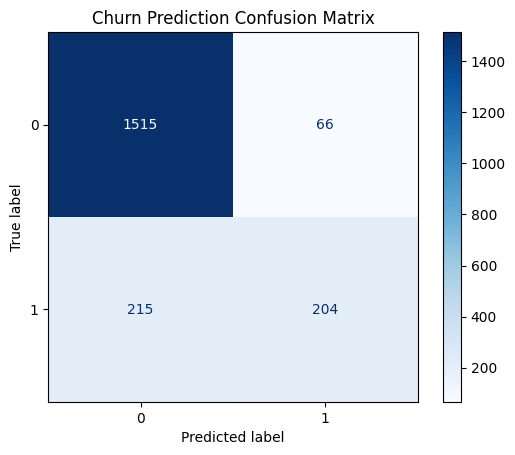

In [64]:
# eval with confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Churn Prediction Confusion Matrix')
plt.show()

# FINAL PROJECT SUMMARY: BANK CUSTOMER CHURN PREDICTION

**Objective**: The goal of this project was to clean, explore, and prepare a bank customer dataset to predict the likelihood of churn (Exited) using a RandomForestClassifier.

**Key Findings from EDA**:
- **Age**: Older customers (40-60) showed significantly higher churn rate than younger demographics.
- **Number of Products**: Customers with 3 or 4 products had a near -100% churn rate, suggesting a potential issue with multi-product service satisfaction
- **Geography**: Customers in Germany showed higher churn rates compared to those in France and Spain
- **Tenure & Salary**: These features showed almost no correlation with a customer's decision to leave

**Model Performance**:
- **Overall Accuracy**: 85.95%
- **Observation**: While model accuracy is high, the confusion matrix reveals the model is conservative.  It correctly identifies approximately 49% of actual churners (True Positives) but misses about 51% (False Negatives).  This disparity indicates a bias towards the majority class (non-churners).

**Future Recommendations**:
To make this model more actionable for a retention team, the following steps are recommended:
1. **Adjust Decision Threshold**: lower classification threshold from 0.5 to 0.3 to prioritize recall, ensuring we catch more at-risk customers.
2. **Handle Imbalance**: Use techniques like SMOTE to give more importance to the churner class during training
3. **Feature Refinement**: re-evaluate the balance_v_income feature to see if log-scaling reduces the impact of extreme outliers